<a href="https://colab.research.google.com/github/shrankhalas/SmartBridge-AI-assignments/blob/Assignment3/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import to_categorical

In [ ]:
import gdown
import zipfile
import os

# Google Drive file ID
file_id = "1DHEbZ4z1o8uYgAOowrHBMCNKw39G5Q1t"

# Download the ZIP file
output_zip = "animals_dataset.zip"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_zip, quiet=False)

# Extract the ZIP file
extract_folder = "dataset"
with zipfile.ZipFile(output_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Check extracted contents
print("Extraction complete! Extracted files:", os.listdir(extract_folder))


Downloading...
From (original): https://drive.google.com/uc?id=1DHEbZ4z1o8uYgAOowrHBMCNKw39G5Q1t
From (redirected): https://drive.google.com/uc?id=1DHEbZ4z1o8uYgAOowrHBMCNKw39G5Q1t&confirm=t&uuid=c3376d19-ffff-43bd-ba64-8e5578c39c09
To: /content/animals_dataset.zip
100%|██████████| 688M/688M [00:09<00:00, 74.9MB/s]


Extraction complete! Extracted files: ['animals', 'name of the animals.txt']


In [ ]:
from keras.layers import Conv2D # to add convolutional layers
from keras.layers import MaxPooling2D # to add pooling layers
from keras.layers import Flatten # to flatten data for fully connected layer

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define augmentation transformations
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values
    rotation_range=30,         # Random rotation up to 30 degrees
    width_shift_range=0.2,     # Random horizontal shift
    height_shift_range=0.2,    # Random vertical shift
    shear_range=0.2,           # Shearing transformation
    zoom_range=0.2,            # Random zoom
    horizontal_flip=True,      # Flip images horizontally
    fill_mode="nearest",       # Fill in missing pixels after transformation
    validation_split=0.2       # Use 20% of data for validation
)


In [ ]:
dataset_path = "dataset"  # Folder containing 95 subfolders (one per animal)

# Training data
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),  # Resize images to fit CNN input size
    batch_size=32,
    class_mode="categorical",  # Since we have 95 categories (multi-class classification)
    subset="training"         # Use the training split
)

# Validation data (same augmentation but without certain transformations)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

val_generator = val_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="validation"  # Use the validation split
)


Found 4320 images belonging to 1 classes.
Found 1080 images belonging to 1 classes.


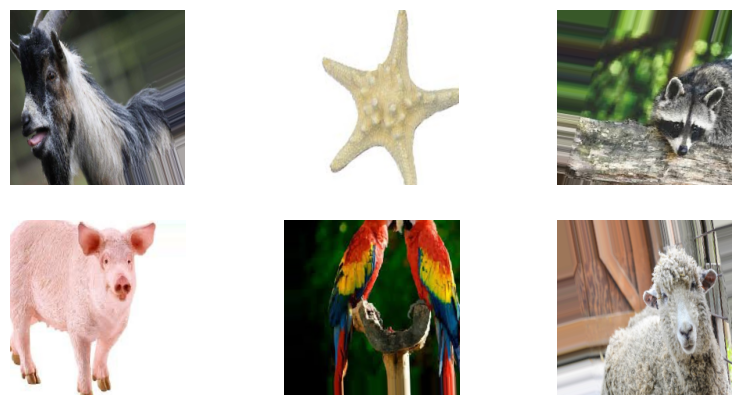

In [ ]:
import matplotlib.pyplot as plt

# Get a batch of images and labels
images, labels = next(train_generator)

# Display some images
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.axis("off")
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
img_size = 224  # Resize images to 224x224
batch_size = 32
num_classes = 95  # Since there are 95 animal categories
dataset_path = "dataset"  # Path to the dataset containing 95 folders

#Data Augmentation & Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=30,  # Random rotations
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,  # Shearing transformation
    zoom_range=0.2,  # Random zooming
    horizontal_flip=True,  # Flip images horizontally
    validation_split=0.2  # Use 20% of data for validation
)

#Load Training Data
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="sparse",  # Labels will be integers (0 to 94)
    subset="training"
)


#Load Validation Data
val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

#Define CNN Model
def convolutional_model():
    model = Sequential([
        Input(shape=(img_size, img_size, 3)),  # RGB images
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(256, activation='relu'),
        Dense(num_classes, activation='softmax')  # Output layer with 95 classes
    ])

    # Compile model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the Model
model = convolutional_model()
model.fit(train_generator, validation_data=val_generator, epochs=10)

#Save the Model
model.save("animal_classifier.h5")

print("Model training complete and saved successfully!")


Found 4320 images belonging to 1 classes.
Found 1080 images belonging to 1 classes.
Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 97s 669ms/step - accuracy: 0.9596 - loss: 0.1827 - val_accuracy: 0.0000e+00 - val_loss: 754.8694
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 88s 656ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 754.9837
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 85s 627ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 754.8459
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 84s 622ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 751.9450
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 84s 622ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 752.5641
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 84s 622ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 754.5140
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 83s 617ms/step - accuracy: 1.0000 

Model training complete and saved successfully!
